In [2]:
# IMPORT LIBRARIES 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.svm import SVC


In [3]:
#Create Claasifiers
# initialize model 
svc = SVC(kernel= "rbf")


In [4]:
data = pd.read_excel("/home/oiao1/project/csv/gene.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 4 columns):
ID         53 non-null object
Bmi        53 non-null object
obesity    53 non-null object
outcome    53 non-null int64
dtypes: int64(1), object(3)
memory usage: 1.8+ KB


In [5]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name] = le.fit_transform(data[column_name])
    else: 
        pass



In [6]:
data_x = data.iloc[:, :2]
data_y = data["outcome"]

In [7]:
svc.fit(data_x, data_y)

SVC()

In [8]:
y_pred_svm = svc.decision_function(data_x)

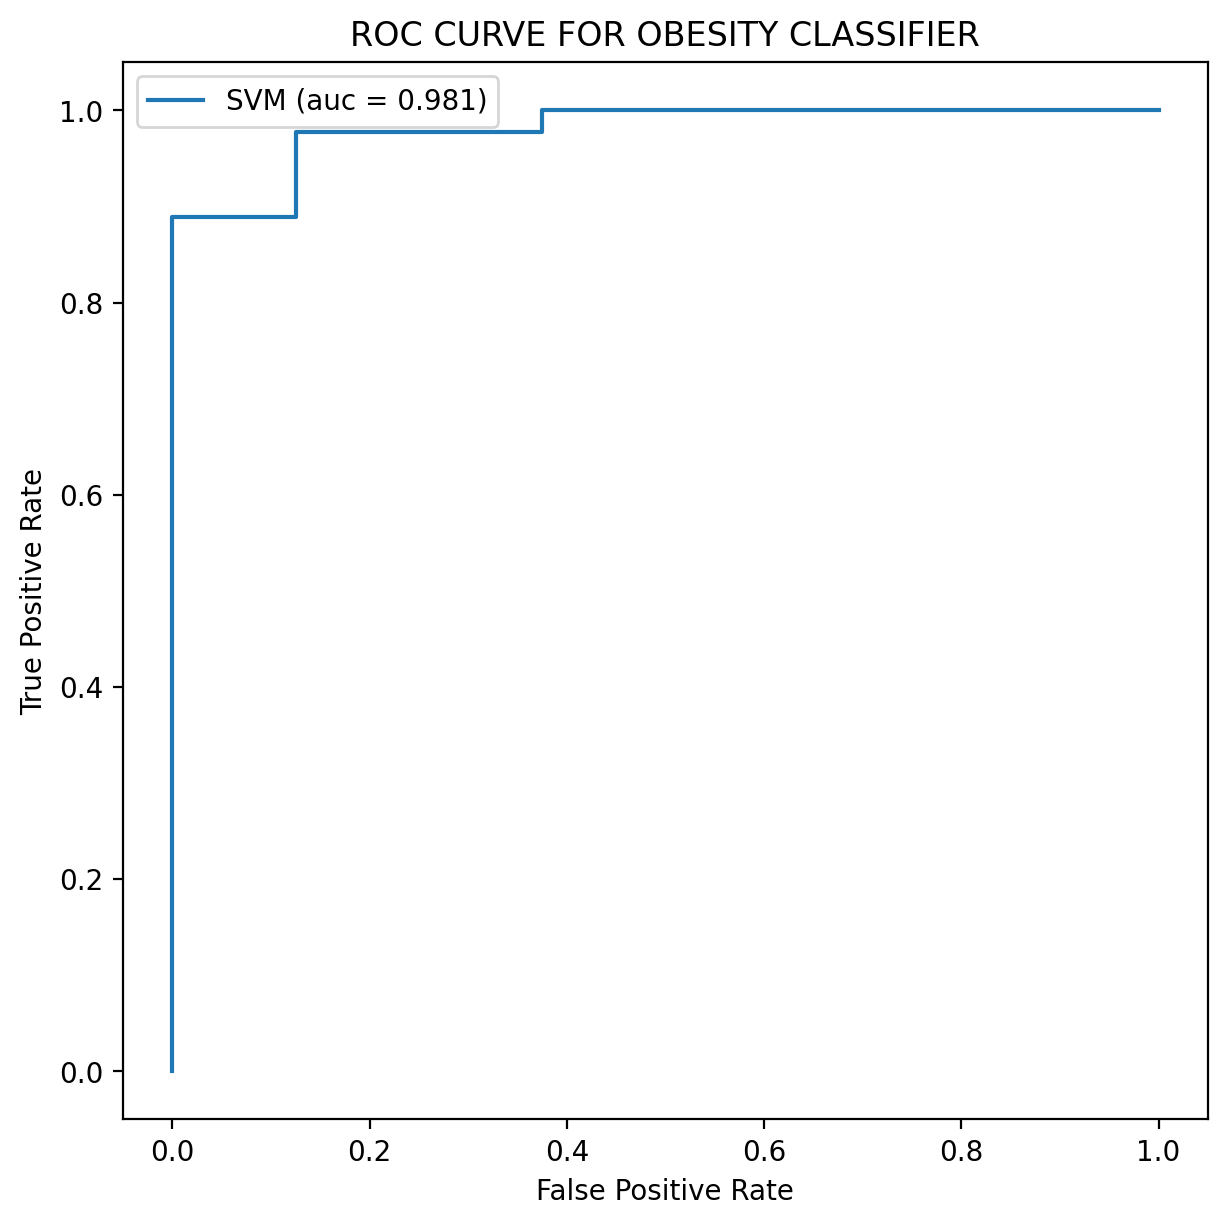

In [9]:
from sklearn.metrics import roc_curve, auc

svm_fpr, svm_tpr, threshold = roc_curve(data_y, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(7,7), dpi =200)
plt.plot(svm_fpr, svm_tpr, linestyle = "-", label = "SVM (auc = %0.3f)" % auc_svm)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC CURVE FOR OBESITY CLASSIFIER")
plt.legend()

plt.show()

In [10]:
import seaborn as sns 

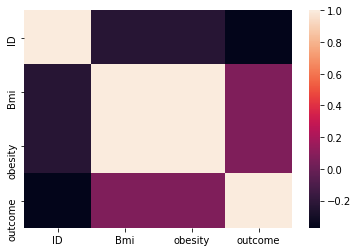

In [11]:
# creating a correction coefficient
sns.heatmap(data.corr())


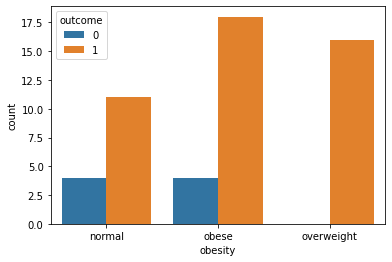

In [27]:
data_plot = data.copy()
data_plot["obesity"] = data_plot["obesity"].replace({0: "normal", 1: "overweight", 2: "obese"})
sns.countplot(x="obesity", hue= "outcome", data= data_plot)